In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import netCDF4
import numpy as np
import os
from datetime import datetime, date
import seaborn as sns
import pickle

In [9]:
wavelength_array = [400, 412, 442, 490, 510, 560, 620, 665, 674, 681, 709, 754, 865, 940, 1012]

In [6]:
linearreg = pickle.load(open("linearreg.sav", 'rb'))
slope = linearreg.coef_
intercept = linearreg.intercept_

In [14]:
def smoothing(data, smooth_order=0):
    global wavelength_array
    new_dataset = dict()
    for wavelength in wavelength_array:
        new_dataset[wavelength] = np.array(data.variables[f'Rrs_{wavelength}'])
        
    if smooth_order > 0:
        for _ in range(smooth_order):
            for current_band, next_band in zip(wavelength_array[:-smooth_order], wavelength_array[smooth_order:]):
                new_dataset[wavelength] = (new_dataset[next_band]-new_dataset[current_band])/(next_band-current_band)
        return new_dataset
    
    else:
        return data

def cal_CI_from_matrixdata(data, smooth_order=2, method='Scattering 3', bands=[490,560,510]):
    #smooth data:
    data = smoothing(data, smooth_order=smooth_order)
    band1, band2, band3 = bands
    band1_val = data[band1]
    band2_val = data[band2]
    if band3 != None:
        band3_val = data[band3]
    
    if method=='Scattering 1':
        CI_matrix = band1_val/band2_val
    if method=='Scattering 2':
        CI_matrix = (band2_val-band1_val)/(band2_val+band1_val)
    if method=='Scattering 3':
        CI_matrix = (1/band1_val - 1/band2_val)*band3_val
    if method=='Fluorescence':
        CI_matrix = band2_val - band1_val + (band1_val-band2_val)*(band2-band1)/(band3-band1)
    return CI_matrix

def cal_chlrophyll_from_CI(CI_matrix):
    global slope, intercept
    chl_estimate = slope*CI_matrix + intercept
    #replace negative value with 0 to have valid chlorophyll concentration: 
    chl_estimate[chl_estimate<0] = 0
    return chl_estimate

In [91]:
data_folder = "/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/"
filename_list = os.listdir(data_folder)
filename = filename_list[0]
path = f"{data_folder}{filename}"
data = netCDF4.Dataset(path)
land_data = cloud_in_lakes = np.array(data.variables["LAND"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less


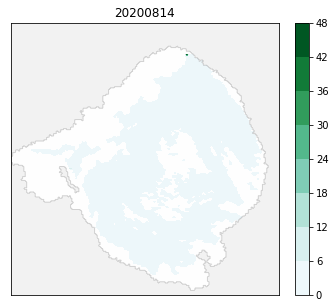

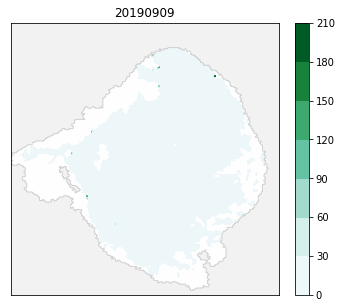

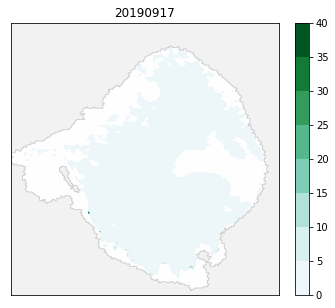

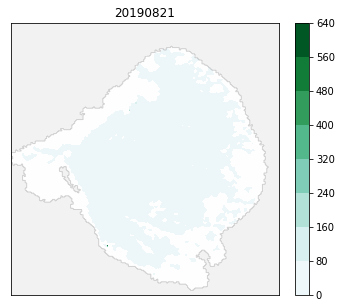

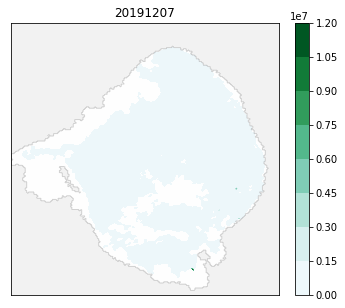

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


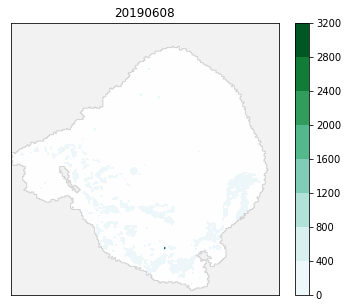

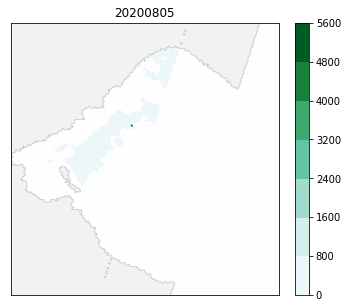

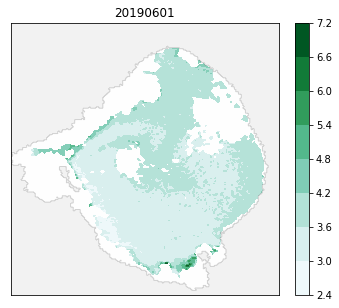

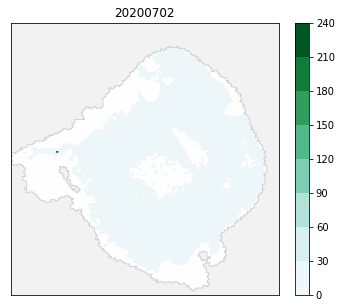

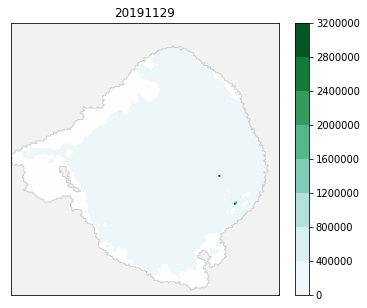

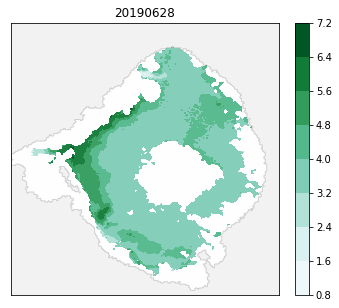

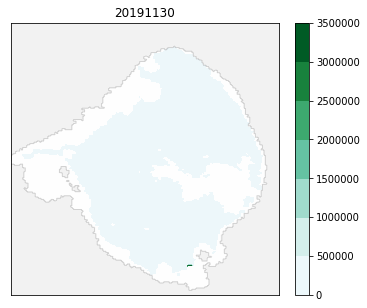

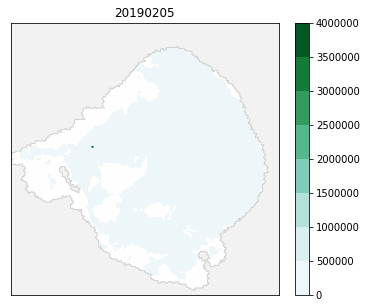

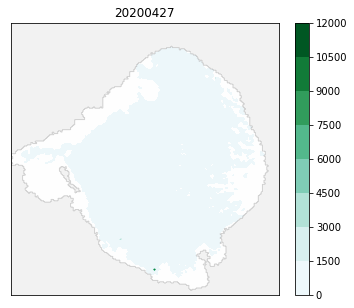

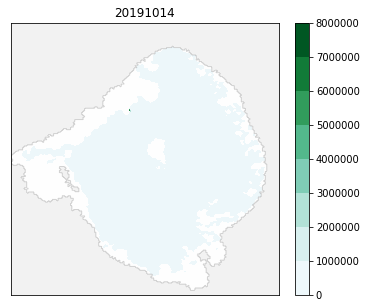

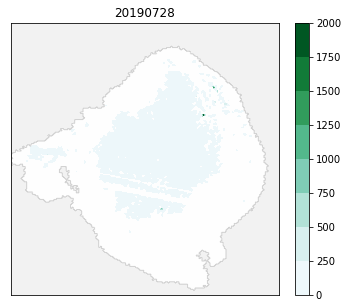

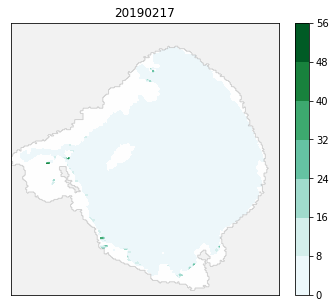

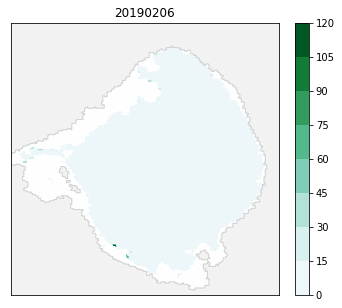

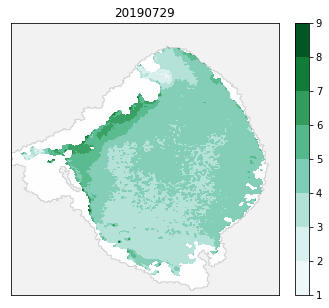

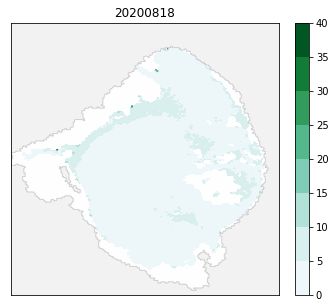

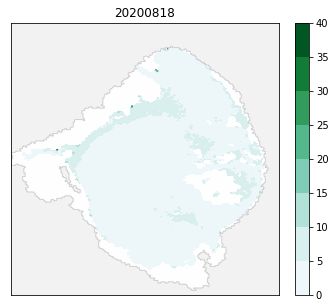

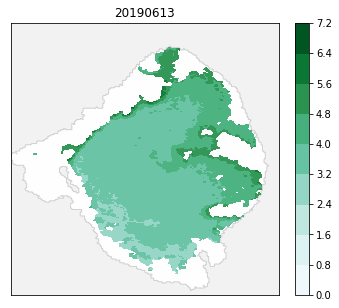

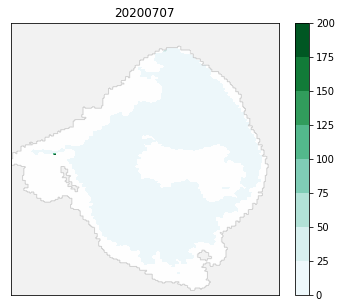

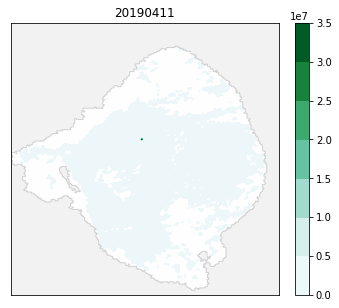

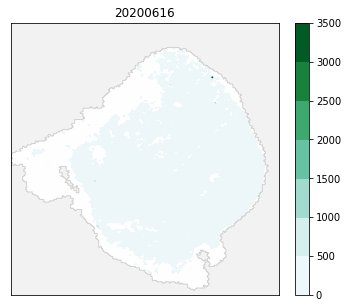

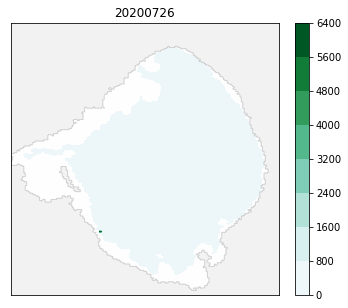

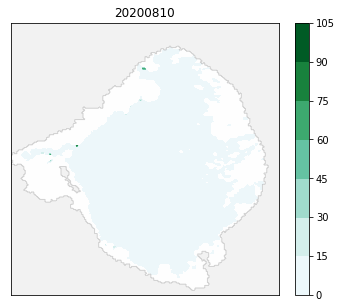

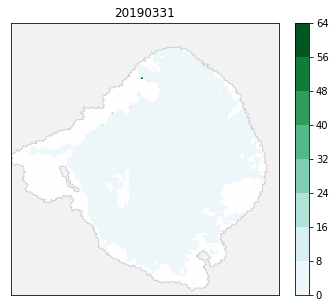

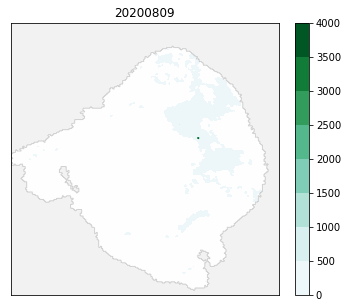

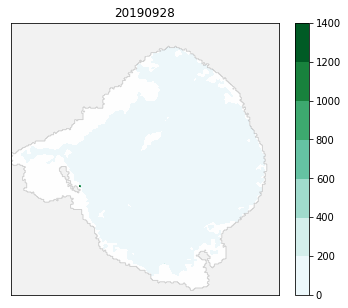

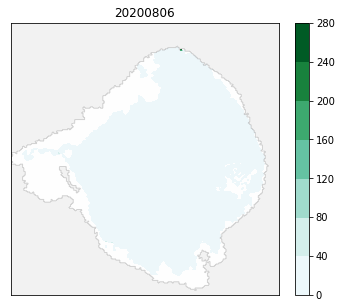

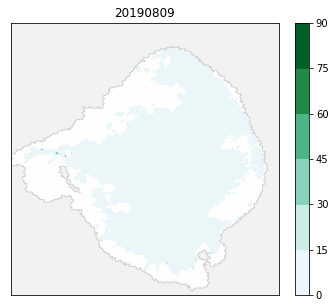

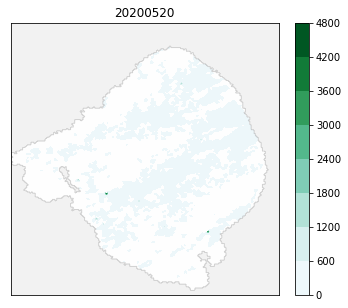

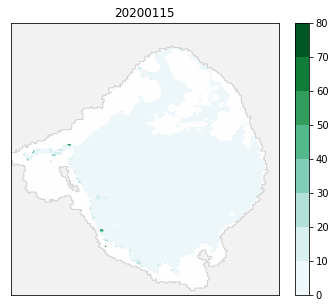

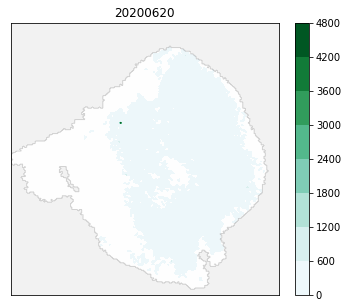

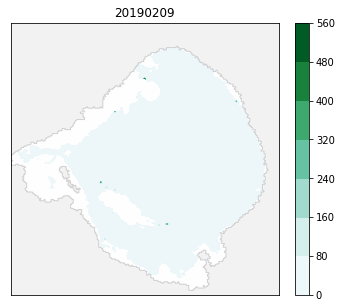

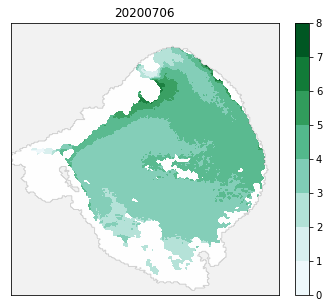

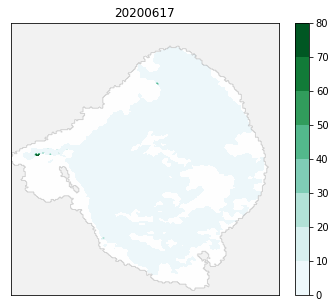

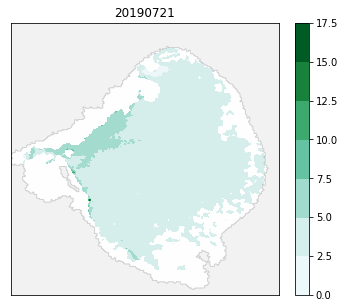

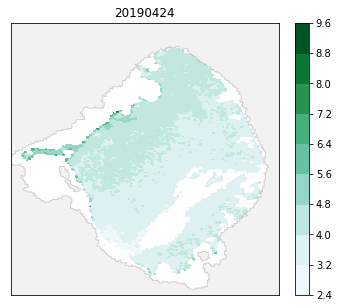

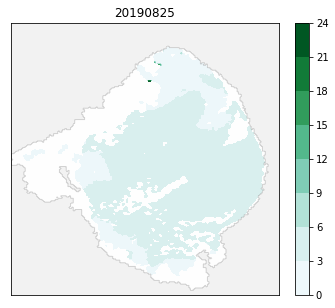

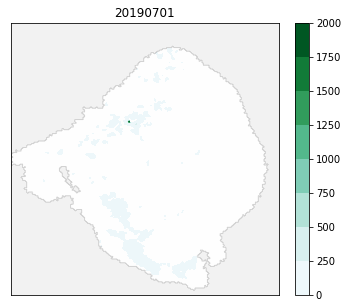

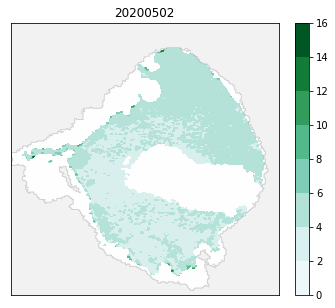

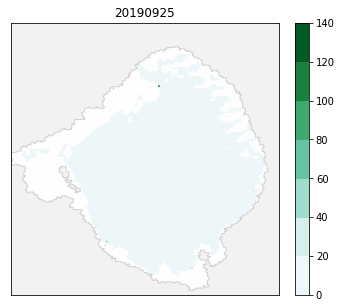

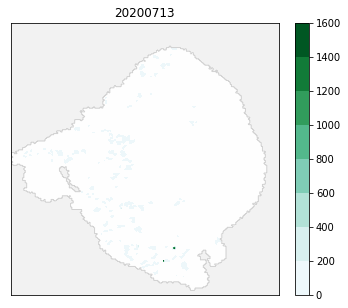

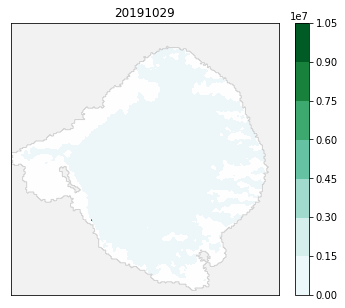

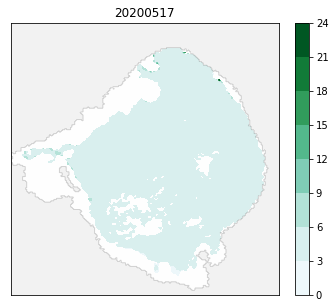

In [17]:
for filename in filename_list:
    if "S3B" in filename:
        path = f"{data_folder}{filename}"
        data = netCDF4.Dataset(path)
        cloud_in_lake = cloud_in_lakes = np.where(np.array(data.variables["LAND"])==1, 0, np.array(data.variables["CLOUD"]))
        cloud_in_lake_percent = np.sum(cloud_in_lake)/(216*191)
        if cloud_in_lake_percent < 0.2:
            CI_matrix = cal_CI_from_matrixdata(data)
            chl_matrix = cal_chlrophyll_from_CI(CI_matrix)
            plt.figure(figsize=(6,5))
            plt.contourf(np.flip(chl_matrix,0), cmap="BuGn")
            #Use timepoint as the title for the graph:
            plt.title(filename[16:24])
            plt.colorbar()
            plt.contourf(np.flip(data.variables["LAND"],0), alpha=0.05, cmap='binary')
            plt.xticks([])
            plt.yticks([])
            plt.show()
        data.close()

In [26]:
#Year: filename[16:20]
#Month: filename[20:22]

In [56]:
A = [[1,2,3],[10,3,4]]
B = [[2,3,1],[30,6,7]]
C = [A,B]
C

[[[1, 2, 3], [10, 3, 4]], [[2, 3, 1], [30, 6, 7]]]

In [57]:
np.mean(C,axis=1)

array([[ 5.5,  2.5,  3.5],
       [16. ,  4.5,  4. ]])

In [58]:
np.mean(C,axis=0)

array([[ 1.5,  2.5,  2. ],
       [20. ,  4.5,  5.5]])

In [68]:
for i in range(len(all_chl_in_month)):
    print(np.nanmax(all_chl_in_month[i]))

6.630028844117409
7265276.589519124
3.9047816449399724
nan
22.809610889959483
28.163440072971763
1130422.5728638503
367.976568540575
13.384698274304803
477.0840628563295
3.663925931104316
9208176.741525583


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: All-NaN slice encountered
  


In [86]:
chl_matrix[chl_matrix<=40].shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


(15618,)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


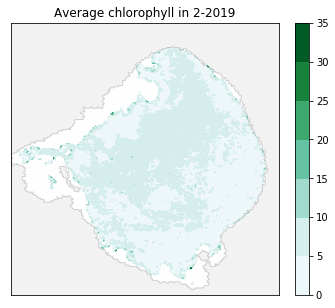

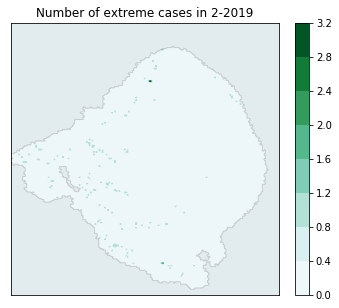

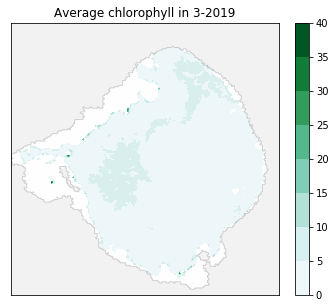

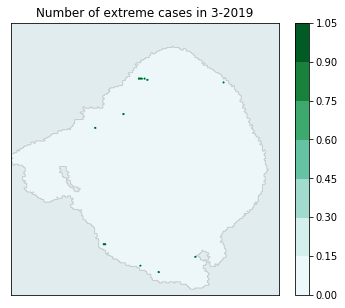

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


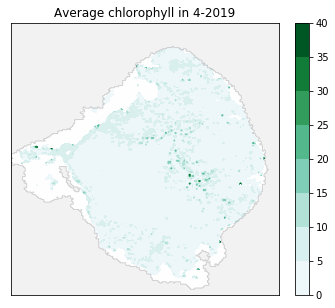

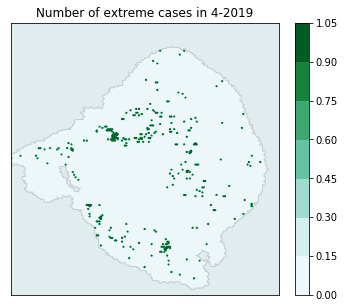

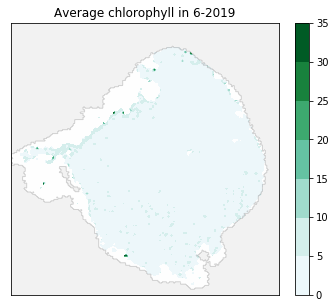

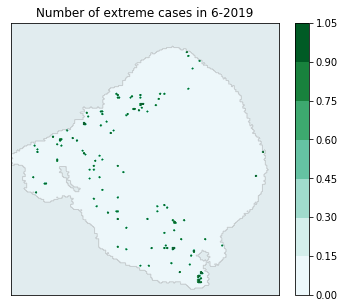

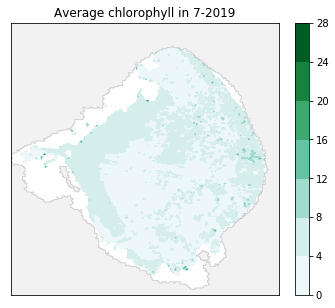

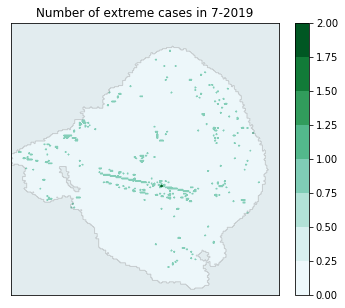

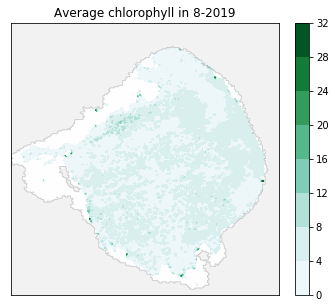

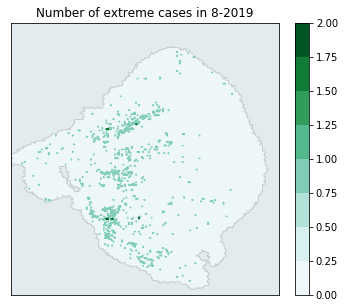

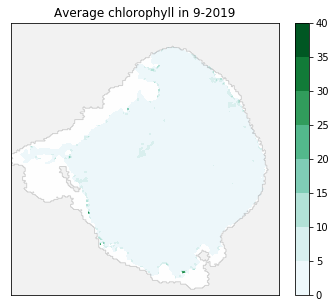

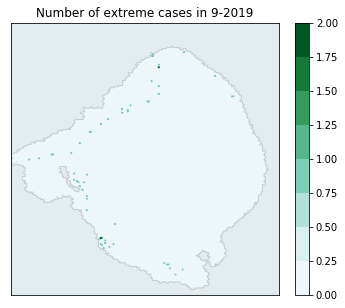

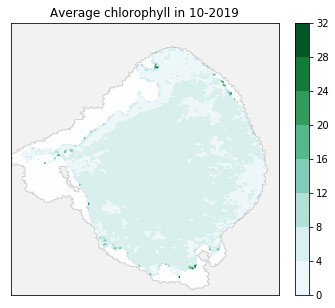

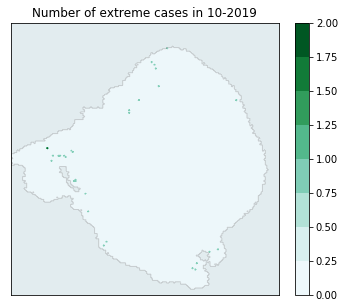

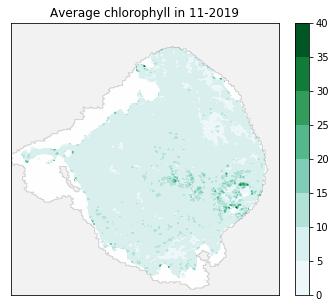

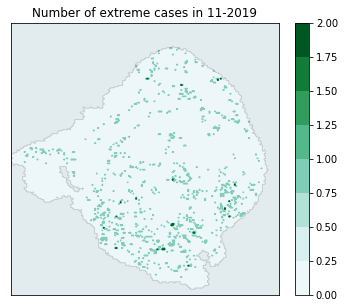

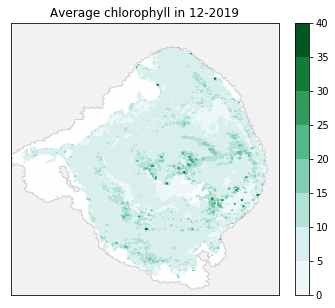

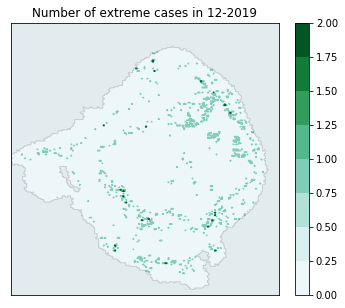

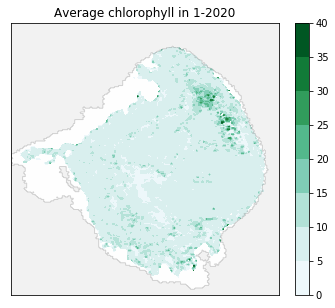

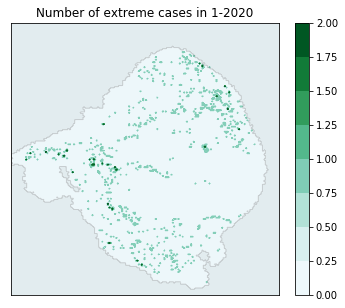

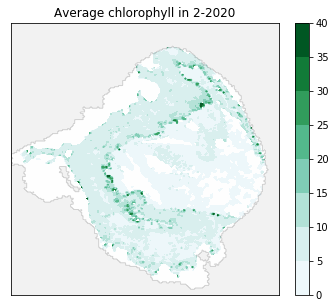

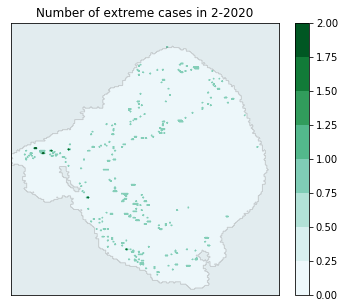

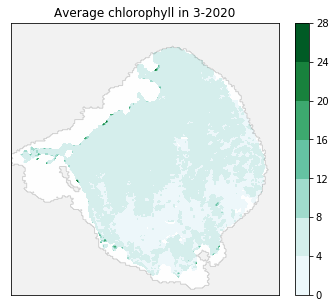

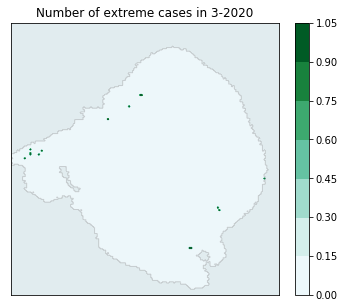

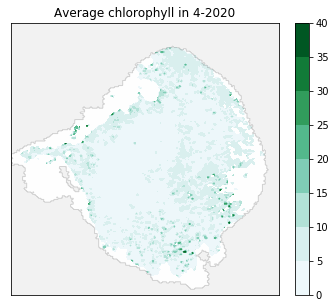

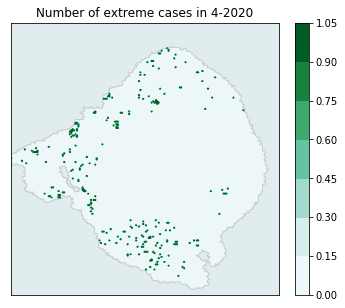

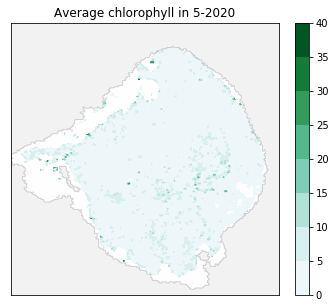

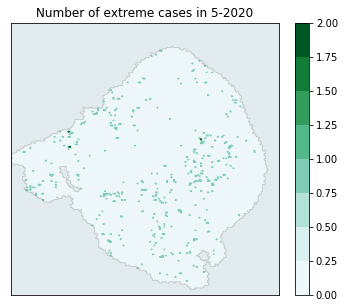

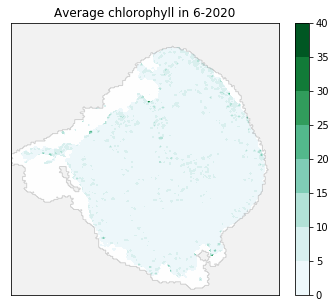

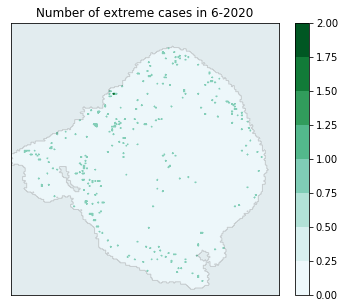

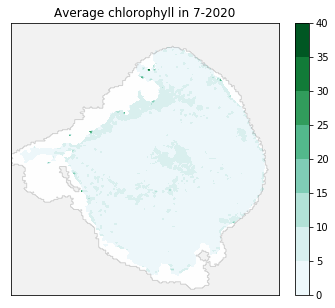

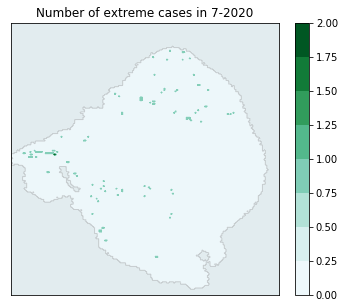

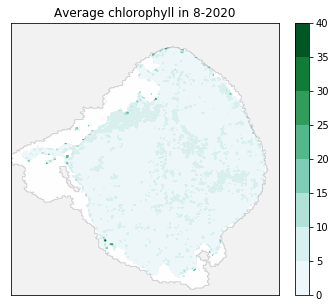

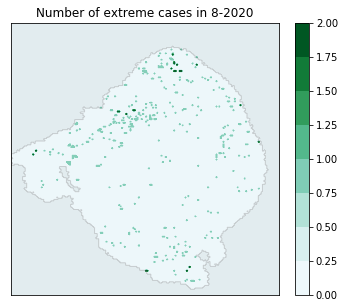

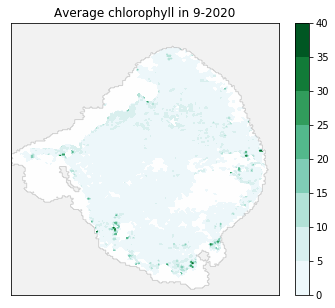

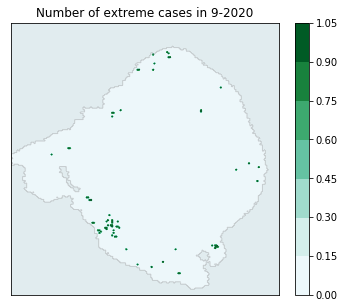

In [92]:
for year_interest in [2019,2020]:
    for month_interest in range(1,13):

        all_chl_in_month = []
        extreme_cases_in_month = [] 

        for filename in filename_list:
            if "S3B" in filename:
                if int(filename[16:20])==year_interest and int(filename[20:22])==month_interest:
                    path = f"{data_folder}{filename}"
                    data = netCDF4.Dataset(path)
                    chl_matrix = cal_chlrophyll_from_CI(CI_matrix)
                    CI_matrix = cal_CI_from_matrixdata(data)
                    extreme_cases_in_month.append(chl_matrix>40)
                    chl_matrix[chl_matrix>40] = np.nan
                    all_chl_in_month.append(chl_matrix)
                    
                    data.close()
                    
        if len(all_chl_in_month) > 0:
            average_chl_in_month = np.nanmean(all_chl_in_month,axis=0)
            plt.figure(figsize=(6,5))
            plt.contourf(np.flip(average_chl_in_month,0), cmap="BuGn")
            #Use timepoint as the title for the graph:
            plt.colorbar()
            plt.contourf(np.flip(land_data,0), alpha=0.05, cmap='binary')
            plt.xticks([])
            plt.yticks([])
            plt.title(f'Average chlorophyll in {month_interest}-{year_interest}')
            plt.show()
        if len(extreme_cases_in_month) > 0: 
            sum_extreme = np.nansum(extreme_cases_in_month,axis=0)
            plt.figure(figsize=(6,5))
            plt.contourf(np.flip(sum_extreme,0), cmap="BuGn")
            #Use timepoint as the title for the graph:
            plt.colorbar()
            plt.contourf(np.flip(land_data,0), alpha=0.05, cmap='binary')
            plt.xticks([])
            plt.yticks([])
            plt.title(f'Number of extreme cases in {month_interest}-{year_interest}')
            plt.show()
            #print(extreme_cases)

In [35]:
average_chl_in_month = np.nanmean(all_chl_in_month,axis=0)
plt.figure(figsize=(6,5))
plt.contourf(np.flip(average_chl_in_month,0), cmap="BuGn")
#Use timepoint as the title for the graph:
plt.title(filename[16:24])
plt.colorbar()
#plt.contourf(np.flip(data.variables["LAND"],0), alpha=0.05, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title(f'{month_interest}-{year_interest}')
plt.show()

nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract


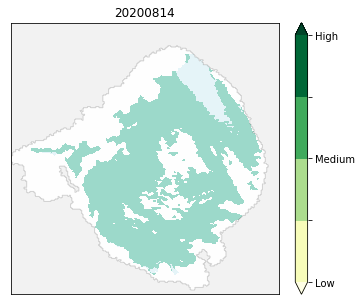

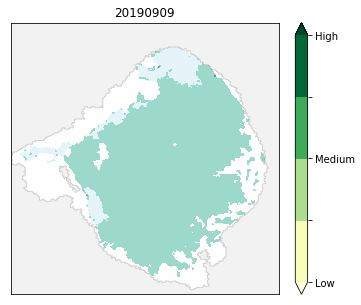

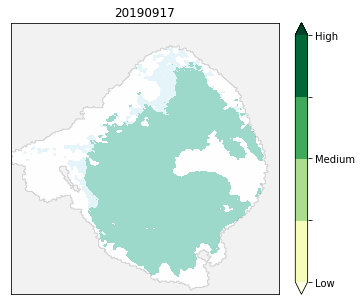

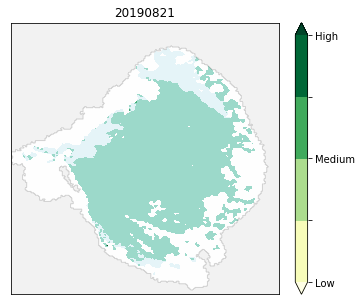

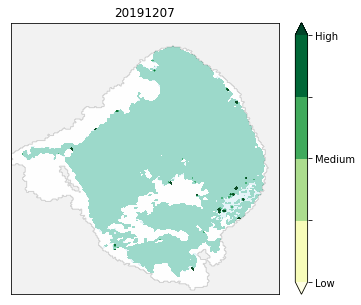

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


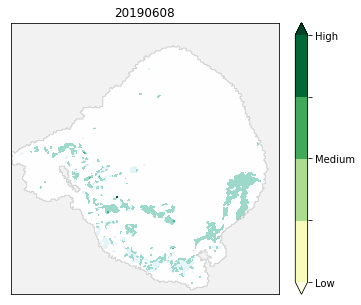

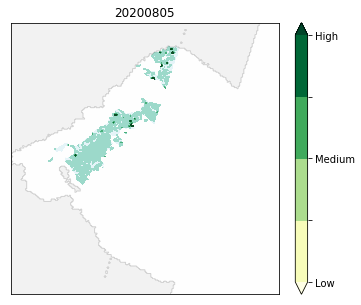

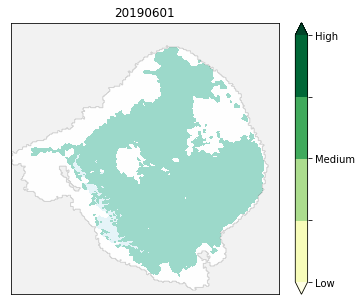

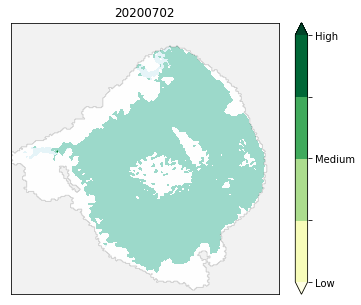

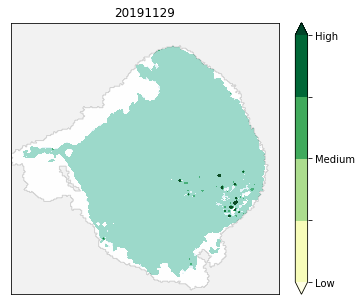

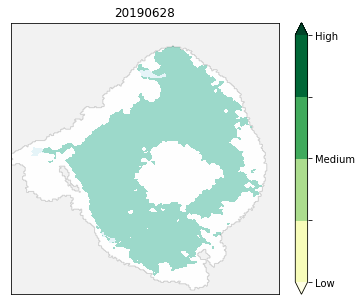

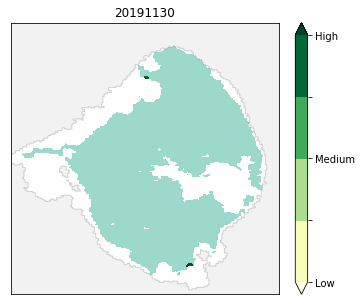

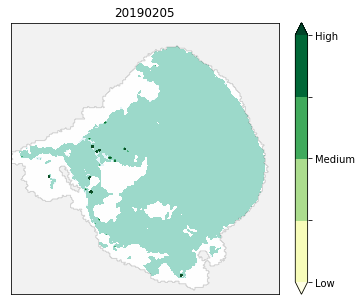

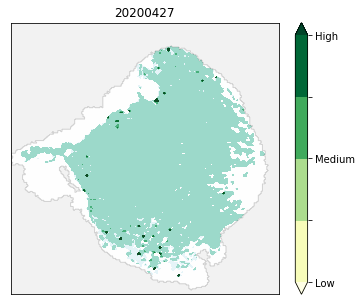

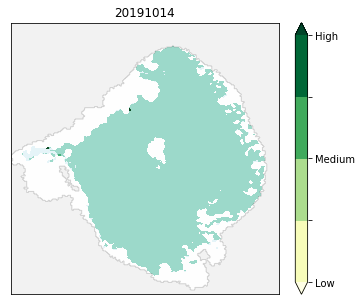

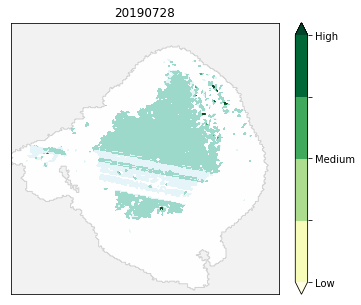

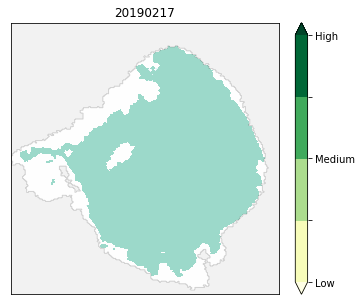

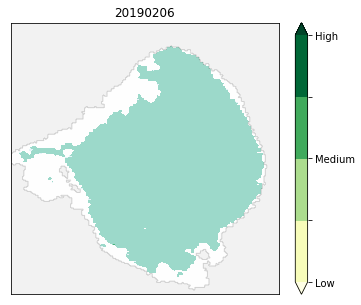

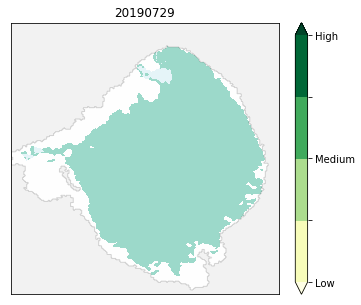

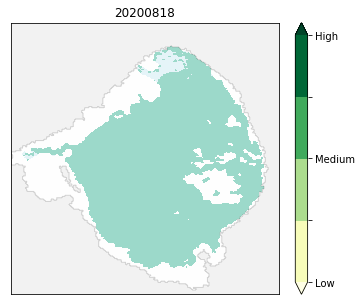

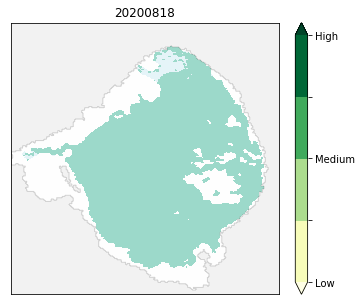

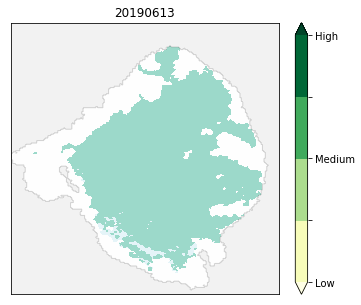

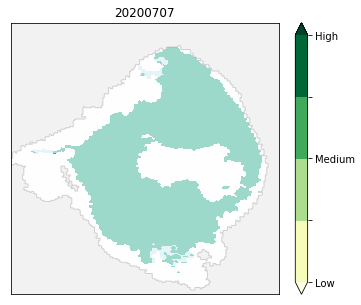

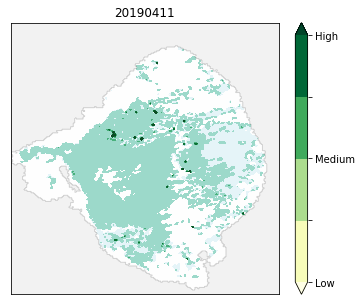

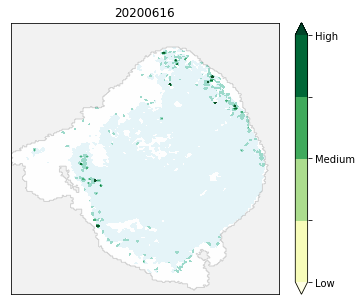

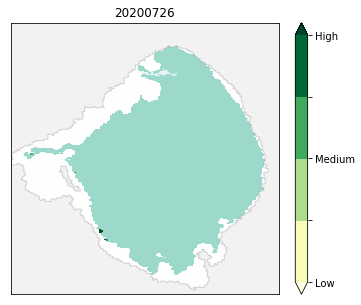

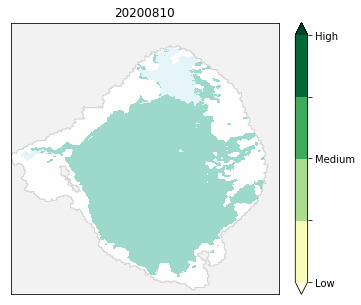

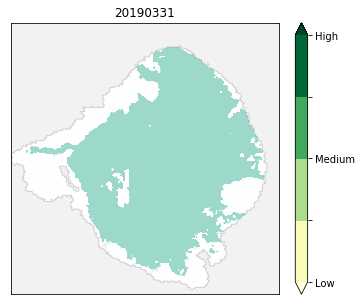

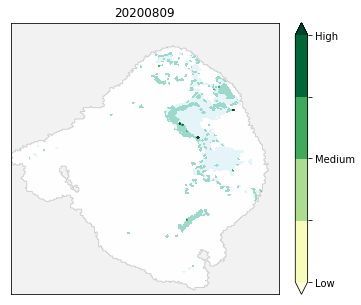

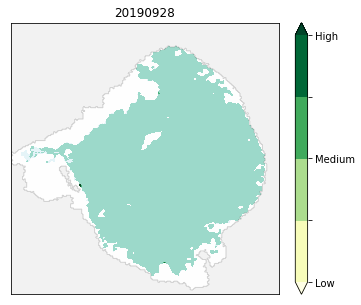

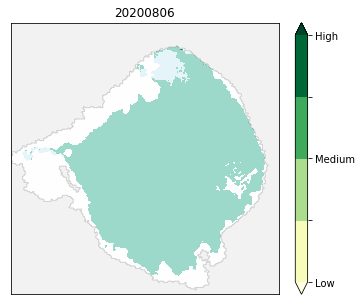

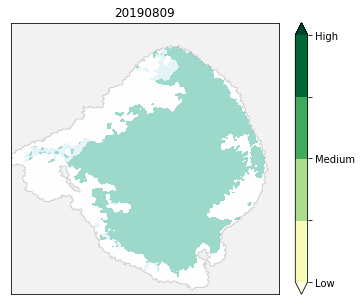

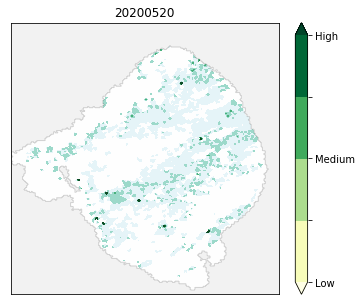

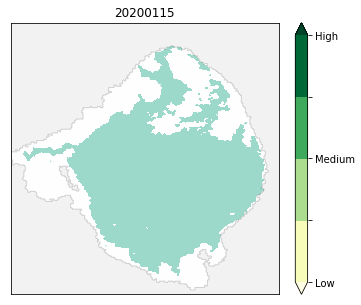

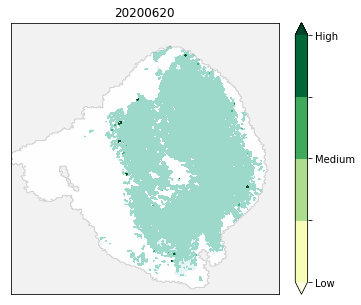

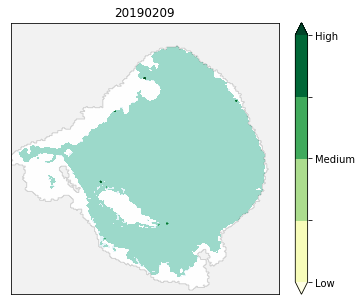

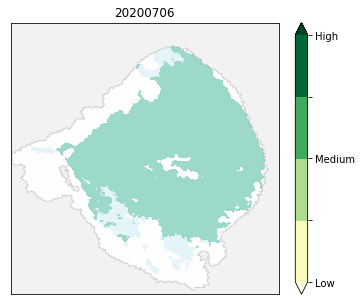

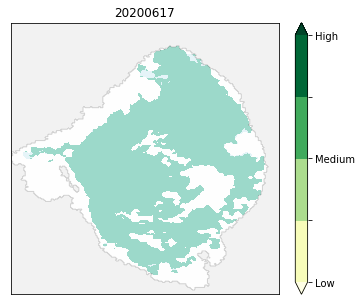

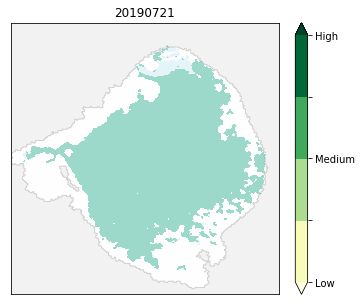

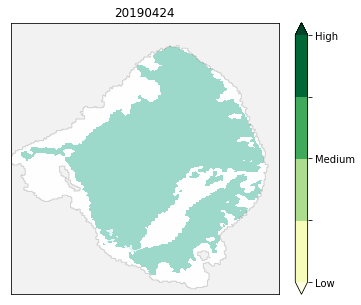

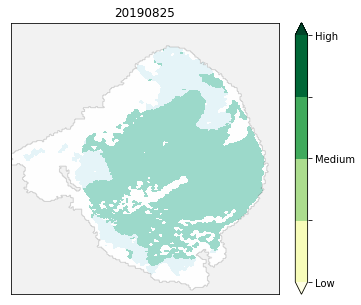

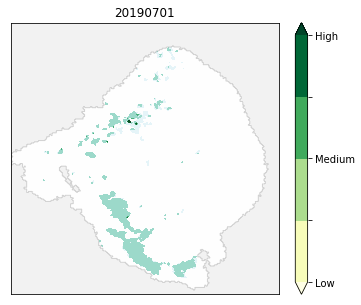

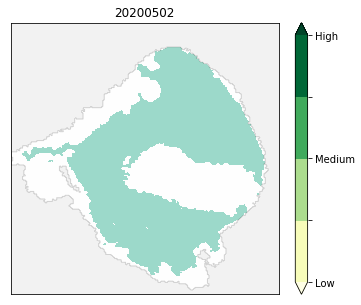

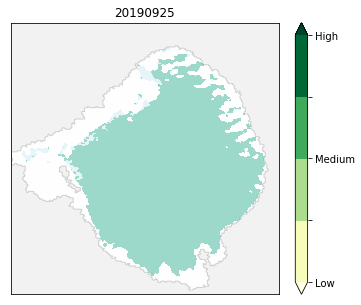

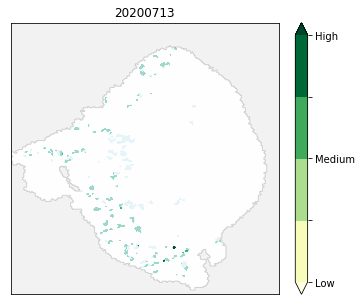

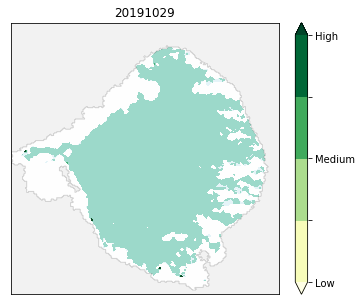

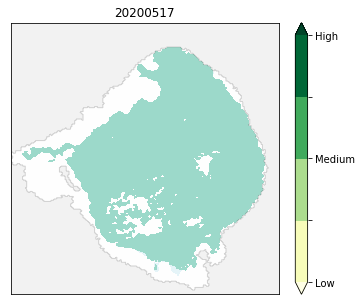

In [127]:
for filename in filename_list:
    if "S3B" in filename 
        data = netCDF4.Dataset(path)

        CI_matrix = cal_CI_from_matrixdata(data)
        plt.figure(figsize=(6,5))
        plt.contourf(np.flip(CI_matrix,0), cmap="BuGn", 
                    vmin=-20, vmax=60, extend='both', levels=np.linspace(vmin,vmax,5))
        #Use timepoint as the title for the graph:
        plt.title(filename[16:24])
        #plt.colorbar()
        cbar0 = plt.colorbar(cf0)
        cbar0.set_ticklabels(["Low",None,"Medium", None,"High"])
        plt.contourf(np.flip(data.variables["LAND"],0), alpha=0.05, cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.show()
    data.close()

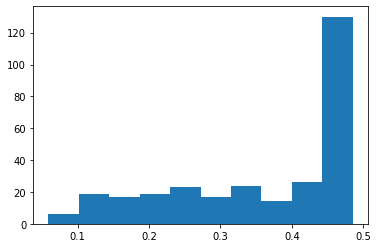

In [10]:
cloud_percents = []
for filename in files:
    if "S3B" in filename:
        path = f"/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/{filename}"
        data = netCDF4.Dataset(path)
        #print(np.sum(data.variables["CLOUD"])/(216*191))
        cloud_in_lake = np.where(np.array(data.variables["LAND"])==1, 0, np.array(data.variables["CLOUD"]))
        cloud_percents.append(np.sum(cloud_in_lake)/(216*191))
plt.hist(cloud_percents)
plt.show()

## Monthly average:

In [ ]:
folder = "/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/"
files = os.listdir(folder)
for filename in files:
    if "S3B" in filename:
        path = f"/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/{filename}"
        data = netCDF4.Dataset(path)
        cloud_in_lake = cloud_in_lakes = np.where(np.array(data.variables["LAND"])==1, 0, np.array(data.variables["CLOUD"]))
        cloud_in_lake_percent = np.sum(cloud_in_lake)/(216*191)
        if cloud_in_lake_percent < 0.2:
            CI_matrix = cal_CI_from_matrixdata(data)
            plt.figure(figsize=(6,5))
            plt.contourf(np.flip(CI_matrix,0), cmap="BuGn")
            #Use timepoint as the title for the graph:
            plt.title(filename[16:24])
            plt.colorbar()
            plt.contourf(np.flip(data.variables["LAND"],0), alpha=0.05, cmap='binary')
            plt.xticks([])
            plt.yticks([])
            plt.show()
        data.close()